<a href="https://colab.research.google.com/github/imrealhelper/Linear-Algebra/blob/main/soft_ware_labs/Ex_Google_PageRank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ex) Google PageRank

$$
\newcommand{\eg}{{\it e.g.}}
\newcommand{\ie}{{\it i.e.}}
\newcommand{\argmin}{\operatornamewithlimits{argmin}}
\newcommand{\mc}{\mathcal}
\newcommand{\mb}{\mathbb}
\newcommand{\mf}{\mathbf}
\newcommand{\minimize}{{\text{minimize}}}
\newcommand{\diag}{{\text{diag}}}
\newcommand{\cond}{{\text{cond}}}
\newcommand{\rank}{{\text{rank }}}
\newcommand{\range}{{\mathcal{R}}}
\newcommand{\null}{{\mathcal{N}}}
\newcommand{\tr}{{\text{trace}}}
\newcommand{\dom}{{\text{dom}}}
\newcommand{\dist}{{\text{dist}}}
\newcommand{\R}{\mathbf{R}}
\newcommand{\SM}{\mathbf{S}}
\newcommand{\ball}{\mathcal{B}}
\newcommand{\bmat}[1]{\begin{bmatrix}#1\end{bmatrix}}
$$

__<div style="text-align: right"> EE370: Software lab, Kyung Hee University. </div>__
_<div style="text-align: right"> Jong-Han Kim (jonghank@khu.ac.kr) </div>_



The Google PageRank, named after Larry Page, one of the co-founders of Google, is an algorithm that ranks the webpages based on the hyperlink connections of the webpages on relevant topics, hence the Google search can return the list of the webpages in an appropriate order of the PageRank indices.

According to Google, the PageRank works by counting the number and quality of links to a page to determine a rough estimate of how important the website is. The underlying assumption is that more important websites are likely to receive more links from other websites.

  <img src="https://upload.wikimedia.org/wikipedia/en/8/8b/PageRanks-Example.jpg" width="500">

The PageRank algorithm outputs a probability distribution used to represent the likelihood that a person randomly clicking on links will arrive at any particular page.

Suppose there are $n$ webpages on a specific topic, where some of them have hyperlinks to others. Then the PageRank of the webpage $i$, $p_i$, can be represented by

$$
  p_i = \frac{1-\zeta}{n} + \sum_{j\in\mc{N}_i} \zeta\frac{p_j}{d_j}
$$

where
- $d_j$ is the number of outbound links from the webpage $j$
- $\mc{N}_i$ is the set of webpages that have the outbound links to the webpage $i$
- $\zeta>0$ is the damping factor, which can be interpreted as the probability that a person is not satisfied with the current webpage and clinks on the links to the other pages, and we normally set $\zeta=0.85$


The above relation can be compactly written by the following matrix form,

$$
  p = \frac{1-\zeta}{n} {\bf 1} + \zeta M p
$$

where $p = \bmat{p_1 & p_2 & \cdots & p_n}^T$, and ${\bf 1}\in\R^{n}$ is the one-vector whose elements are all 1's.

1. What is $M_{ij}$, for $i,j \in \{1,\dots,n\}$?



> ---
> `# your answer here`
>
> $$
M_{ij} =
\begin{cases}
  \frac{1}{d_j} &\quad \text{if $j\in\mc{N}_i$ ($j$ has outbound link to $i$)} \\
  0 &\quad \text{otherwise}
\end{cases}
$$
>
> ---


Once you obtained $M\in\R^{n\times n}$, you can solve the above linear equations for $p$. In other words, you can obtain the PageRank for all the $n$ webpages by

$$
  p = \frac{1-\zeta}{n}\left(I - \zeta M \right)^{-1} {\bf 1}
$$

However in most cases where the number of webpages that contain somethings you are interested in is extremely large, computing the inverse appearing above is practically impossible. For example googling "BTS" returns approximately 528 million documents; you won't be able to compute the inverse of $528000000\times 528000000$ matrix.

Instead of this direct method, you can also solve for $p$ by using the following iterative method.

$$
  p^{k+1} = \frac{1-\zeta}{n} {\bf 1} + \zeta M p^{k}
$$

where $p^k$ stands for the page rank $p$ at the $k$-th iteration step. From a random initial condition $p^0$, you can keep updating $p^k$ until the update amount is sufficiently small. It turns out that this update rule converges for $0<\zeta<1$.

Now a toy example. Suppose we have the small space of 11 webpages whose list of outbound link connections are given by

- Page A has links to A,B,C,D,E,F,G,H,I,J,K (everyone)
- Page B has links to C
- Page C has links to B
- Page D has links to A, B
- Page E has links to B, D, F
- Page F has links to B, E
- Page G has links to B, E
- Page H has links to B, E
- Page I has links to B, E
- Page J has links to E
- Page K has links to E


2. Build $M$. In other words, define a $11\times 11$ matrix $M$ and assign the explicit numeric value for each $M_{ij}$.

In [38]:
import numpy as np
dict_M = {
    "A":{"A","B","C","D","E","F","G","H","I","J","K"},
    "B":{"C"},
    "C":{"B"},
    "D":{"A","B"},
    "E":{"B","D","F"},
    "F":{"B","E"},
    "G":{"B","E"},
    "H":{"B","E"},
    "I":{"B","E"},
    "J":{"E"},
    "K":{"E"}
}
alphabet = sorted(list(dict_M.keys()))
M = np.array([[float(0) for i in range(11)]for j in range(11)])
for i in range(len(M)):
  for j in range(len(M)):
    if alphabet[i] in dict_M[alphabet[j]]:
      M[i][j] = 1 / len(dict_M[alphabet[j]])
    else:
      continue
display(M)

array([[0.09090909, 0.        , 0.        , 0.5       , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.09090909, 0.        , 1.        , 0.5       , 0.33333333,
        0.5       , 0.5       , 0.5       , 0.5       , 0.        ,
        0.        ],
       [0.09090909, 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.09090909, 0.        , 0.        , 0.        , 0.33333333,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.09090909, 0.        , 0.        , 0.        , 0.        ,
        0.5       , 0.5       , 0.5       , 0.5       , 1.        ,
        1.        ],
       [0.09090909, 0.        , 0.        , 0.        , 0.33333333,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.09090909, 0.        , 0.        , 0.        , 0.

3. Randomly generate initial $p^0>0$ such that $\|p^0\|_1=1$, and use the update rule
$$
  p^{k+1} = \frac{1-\zeta}{n} {\bf 1} + \zeta M p^{k}
$$
with $\zeta=0.85$ until the update amount is sufficiently small. For example you could keep iterating until $k=K$ when the following convergence is achieved.
$$\|p^{K+1}-p^{K}\|_2<10^{-6}$$

> a) How many iterations dis you need to get the convergence?
>
>
> b) Which webpage has the highest PageRank? List the PageRank of each page.

convergence in 78 iterations


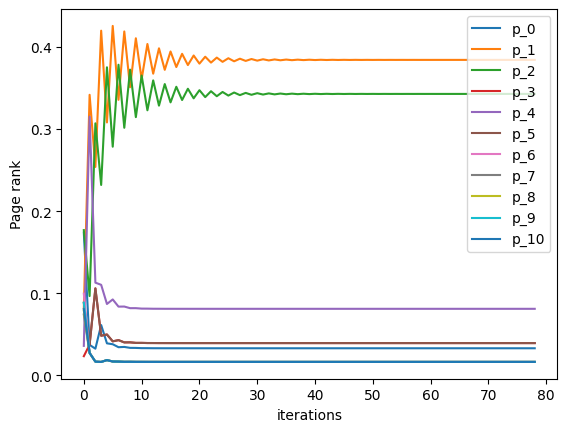

In [13]:
import matplotlib.pyplot as plt
one = np.array([1 for i in range(11)])

n =11

p_before=np.random.rand(n)

abs = np.sum(np.abs(p_before))


p_before = p_before / abs
iteration = 0
p_s=[p_before]
while True:
  p_after = (0.15/11) * one + 0.85 * M@p_before
  if np.linalg.norm(p_after-p_before) < 10**(-6):
    break
  else:
    p_s.append(p_after)
    p_before = p_after
    iteration +=1
p_s=np.array(p_s)
print(f"convergence in {iteration} iterations")
for p in range(11):
  plt.plot(p_s[:,p],label=f"p_{p}")
plt.xlabel("iterations")
plt.ylabel("Page rank")
plt.legend()
plt.show()

EigResult(eigenvalues=array([ 1.00000000e+00+0.j        , -8.50000000e-01+0.j        ,
        5.38757127e-01+0.j        , -4.83851388e-01+0.j        ,
        1.11834942e-02+0.32568031j,  1.11834942e-02-0.32568031j,
        1.23542283e-16+0.j        , -1.03199014e-17+0.j        ,
       -9.31067926e-49+0.j        ,  0.00000000e+00+0.j        ,
        0.00000000e+00+0.j        ]), eigenvectors=array([[ 6.22485303e-02+0.j        ,  3.48578484e-16+0.j        ,
         2.06358121e-01+0.j        ,  3.03935721e-01+0.j        ,
        -4.86407160e-01+0.06228385j, -4.86407160e-01-0.06228385j,
         4.11615895e-17+0.j        , -2.64873527e-16+0.j        ,
        -3.17550294e-17+0.j        ,  3.17550294e-17+0.j        ,
         3.17550294e-17+0.j        ],
       [ 7.29936065e-01+0.j        ,  7.07106781e-01+0.j        ,
        -4.66261068e-01+0.j        , -2.47753289e-01+0.j        ,
        -3.09054336e-02-0.06670525j, -3.09054336e-02+0.06670525j,
         1.99112449e-16+0.j        ,

[ True False False False False False False False False False False]


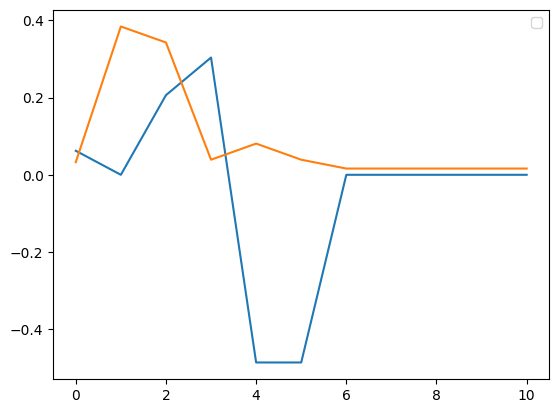

In [52]:

##이는 Eigenvalue와 비슷하다.
damping_ratio=0.85
n=11

##eigenvalue를 계산해보자.

G= (1-damping_ratio)/n * np.outer(np.ones(11),np.ones(11))+damping_ratio*M

eigenvalues,eigenvectors=np.linalg.eig(G)
display(np.linalg.eig(G))
index=np.isclose( eigenvalues,1.0)
print(index)
for i in range(len(index)):
  if index[i]:
    plt.plot(eigenvectors[i,:])



plt.plot(p_s[-1,:])
plt.legend()

plt.show()

---
_<div style="text-align: right">
Contents partially taken from Wikipedia (https://en.wikipedia.org/wiki/PageRank).
</div>_


